In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

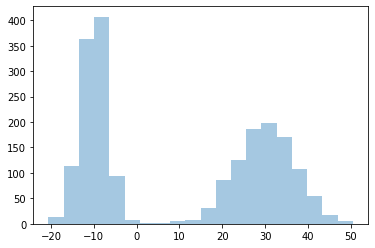

In [41]:
def generate_gaussians(parameters, num_points):
    num_d = len(parameters)
    
    for d in range(num_d):
        yield(np.random.normal(parameters[d][0], parameters[d][1], num_points))

parameters = [[-10, 3], [30, 7]]
num_points = 1000
gaussians = generate_gaussians(parameters, num_points)

points = np.concatenate([next(gaussians) for _ in range(len(parameters))])
sns.distplot(points, bins=20, kde=False)

Guess #1:  [[30, 5], [39, 4]]


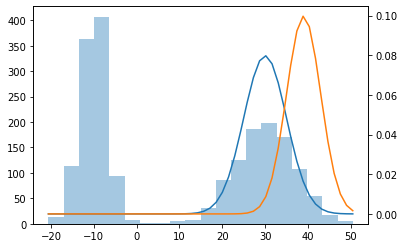

Guess #2:  [[5.57, 18.86], [37.26, 4.15]]


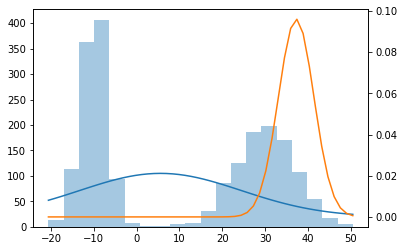

Guess #3:  [[0.7, 16.55], [34.23, 4.59]]


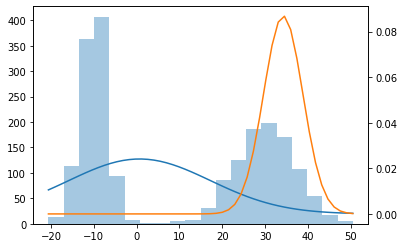

Guess #4:  [[-3.21, 13.89], [32.51, 5.26]]


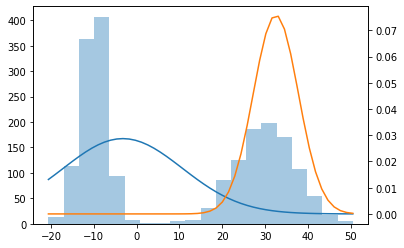

Guess #5:  [[-6.44, 10.38], [31.48, 5.89]]


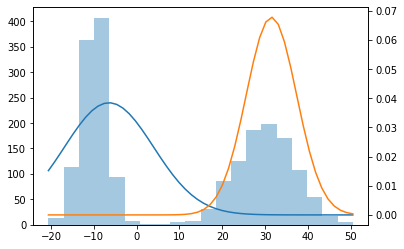

Guess #6:  [[-8.94, 6.07], [30.6, 6.4]]


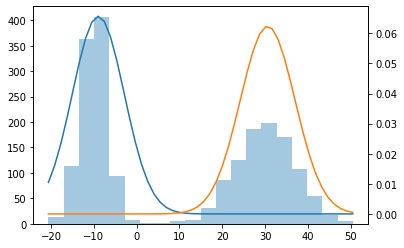

Guess #7:  [[-9.93, 3.27], [30.11, 6.78]]


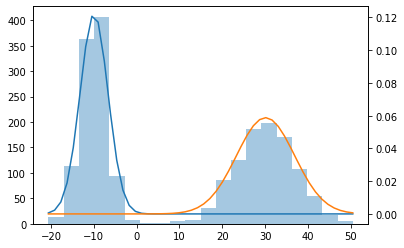

Guess #8:  [[-10.02, 3.01], [30.0, 6.94]]


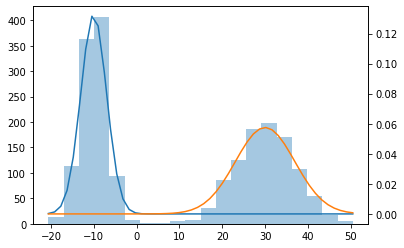

Guess #9:  [[-10.02, 3.0], [30.0, 6.95]]


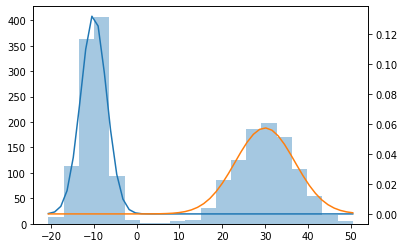

Guess #10:  [[-10.02, 3.0], [29.99, 6.95]]


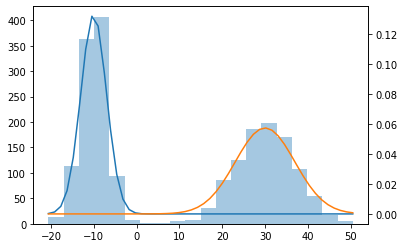

Guess #11:  [[-10.02, 3.0], [29.99, 6.95]]


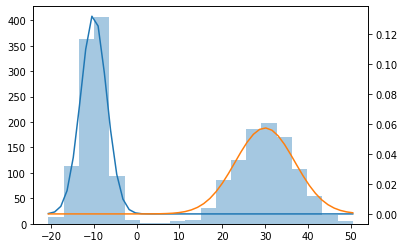

Guess #12:  [[-10.02, 3.0], [29.99, 6.95]]


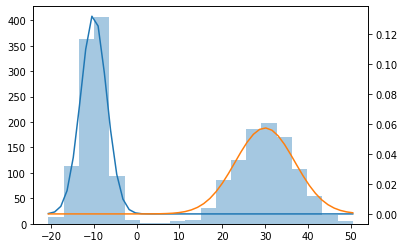

Guess #13:  [[-10.02, 3.0], [29.99, 6.95]]


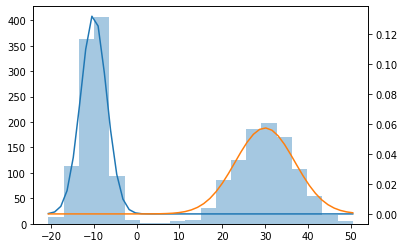

Guess #14:  [[-10.02, 3.0], [29.99, 6.95]]


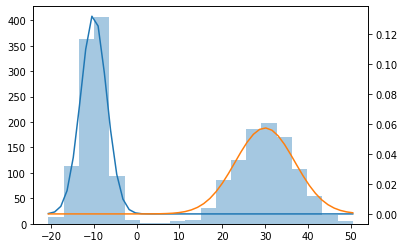

Guess #15:  [[-10.02, 3.0], [29.99, 6.95]]


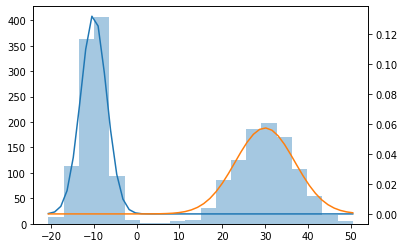

Guess #16:  [[-10.02, 3.0], [29.99, 6.95]]


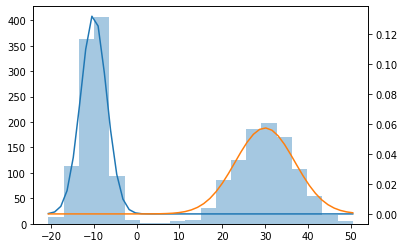

Guess #17:  [[-10.02, 3.0], [29.99, 6.95]]


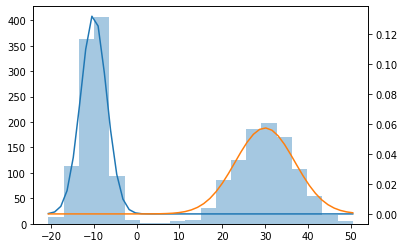

Guess #18:  [[-10.02, 3.0], [29.99, 6.95]]


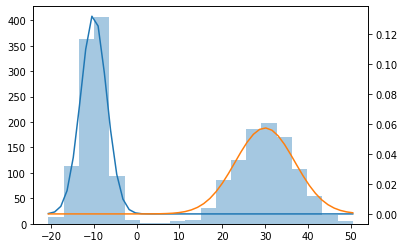

Guess #19:  [[-10.02, 3.0], [29.99, 6.95]]


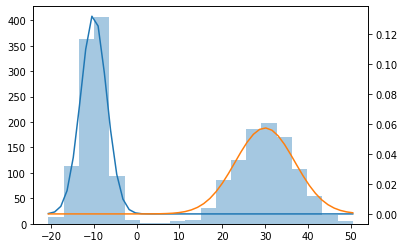

Guess #20:  [[-10.02, 3.0], [29.99, 6.95]]


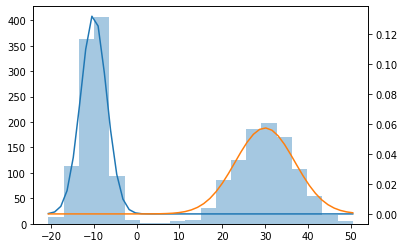

In [42]:
class ND:
    def __init__(self, iterations, points, num_distributions):
        self.iterations = iterations
        self.x = points
        self.num_d = num_distributions
        
    # plots normal distributions given the parameters (mean, standard deviation)
    def plot(self, parameters):
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        x = np.linspace(min(self.x), max(self.x))
        sns.distplot(self.x, bins=20, kde=False, ax=ax1)
        for i in range(self.num_d):
            y = norm(parameters[i][0], parameters[i][1]).pdf(x)
            sns.lineplot(x, y, ax=ax2)
    
    # calculates and normalizes the probabilities the normal distributions generated each point
    def e_step(self, x, parameters):
        r = np.zeros((len(x), self.num_d))
        
        # compute the probabilities the normal distributions generated each point
        distributions = [norm(parameters[i][0], parameters[i][1]) for i in range(self.num_d)]
        for c, d in zip(range(self.num_d), distributions):
            r[:, c] = d.pdf(x)
    
        # normalize the probabilities such that each row of r sums to 1
        for i in range(len(r)):
            r[i] = r[i] / (np.sum(r, axis=1)[i])
        
        return r

    # re-computes the mean and standard deviation per distribution
    def m_step(self, x, r):
        parameters = np.zeros((r.shape[1], 2))
        
        # re-compute the means
        for d in range(r.shape[1]):
            parameters[d][0] = np.dot(r[:, d], x) / np.sum(r[:, d])
        
        # re-compute the std_devs
        for d in range(r.shape[1]):
            parameters[d][1] = np.sqrt(np.sum([r[i, d]*((x[i] - parameters[d][0])**2) for i in range(r.shape[0])]) / np.sum(r[:, d]))
        
        return parameters

    # runs the algorithm
    def run(self):
        # generating unique random means and std_devs        
        parameters = [[np.random.randint(min(self.x), max(self.x)), np.random.randint(1, 10)] for _ in range(self.num_d)]

        for i in range(self.iterations):
            print("Guess #" + str(i+1) + ": ", [[round(parameters[i][0], 2), round(parameters[i][1], 2)] for i in range(self.num_d)])
            
            # plot the normal distributions with the guessed means and std_devs
            self.plot(parameters)
            
            # update the means and std_devs
            r = self.e_step(self.x, parameters)
            parameters = self.m_step(self.x, r)
            
            plt.show()
    
ND = ND(20, points, 2) # 20 iterations, data points, 2 distributions
ND.run()